In [114]:
import pandas as pd 
import numpy as np 
import csv 
import seaborn as sb
import warnings  
warnings.filterwarnings('ignore')

In [125]:
def load_data():
    X_train = pd.read_csv("X_train.csv")
    X_test = pd.read_csv("X_test.csv")
    y_train = pd.read_csv("y_train.csv")

    #dropping id column
    X_train = X_train.drop('id', axis = 1)
    X_test = X_test.drop('id', axis = 1)
    y_train = y_train.drop('id', axis = 1)
    
    #reshuffling data
    X_train['y'] = y_train
    X_train = X_train.sample(frac=1).reset_index(drop=True)
    y_train = X_train['y']
    X_train = X_train.drop('y', axis = 1)
    
    return X_train, X_test, y_train


In [126]:
xtrain, xtest, ytrain = load_data()

"\nfrom the kernel density plot, we notice that the majority of series \nstarts to show NaN's after the ~8500 index point. We will then first \nattempt classification by truncating all the series at the 9000 \ncolumn. We will then pad the series which present NaNs before the 9000\ncolumns with the median of the other series. This is just a first trial.\n"

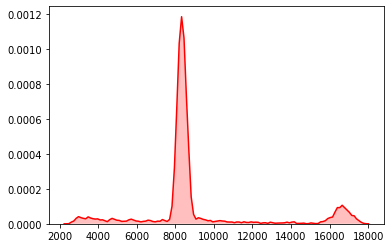

In [127]:
'''
for each row in xtrain, find last indices of last non NaN values
'''
xtrain = xtrain.rename(columns={x:y for x,y in zip(xtrain.columns,range(0,len(xtrain.columns)))})
last_valid_idx = []

for i in range(0,xtrain.shape[0]):
    row = xtrain.iloc[i,:]
    idx = row.last_valid_index()
    last_valid_idx = np.append(last_valid_idx, idx)

ax = sb.kdeplot(last_valid_idx, shade=True, color="r")

'''
from the kernel density plot, we notice that the majority of series 
starts to show NaN's after the ~8500 index point. We will then first 
attempt classification by truncating all the series at the 9000 
column. We will then pad the series which present NaNs before the 9000
columns with the median of the other series. This is just a first trial.
'''

In [128]:
'''
truncate xtrain at 9000 columns and pad shorter series 
'''
#note to self: load_data() reshiffles the data
xtrain = xtrain.iloc[:,0:9000]





In [ ]:
xtrain.head()

In [65]:
len_series = []

for i in range(xtrain.shape[0]):
    len_series.append(len(xtrain[i,:]))
pd.Series(len_series).describe()

8307